# How to deal with weighted statistics (with xarray)

Xarray introduced weighted statistics in v0.15.1 (23 Mar 2020). Here we take a quick look at how to make use of this. It's a good time-saving approach, since broadcasting seems to work well.

In [1]:
import xarray as xr

In [2]:
# some data
ds = xr.open_dataset('/Users/brianpm/Dropbox/DataTemporary/f.e20.F2000climo.f09_f09.ag.release_tag.cam.h0.0001-01.ncrcat.FLNT.nc') 
# don't worry about correcting time rightnow

In [5]:
X = ds['FLNT']

In [10]:
X

<xarray.DataArray 'FLNT' (time: 144, lat: 192, lon: 288)>
[7962624 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0001-02-01 00:00:00 ... 0013-01-01 00:00:00
Attributes:
    Sampling_Sequence:  rad_lwsw
    units:              W/m2
    long_name:          Net longwave flux at top of model
    cell_methods:       time: mean

In [7]:
lat = ds['lat']

In [9]:
import numpy as np

In [22]:
# imagine you don't have any way to get weights:
weights_uni = xr.DataArray(1.0)
weighted_uniform = X.weighted(weights_uni)
# average over spatial dims
dims = X.dims
avgdims = [dim for dim in X.dims if dim != 'time']
print(avgdims)
x_avg_uniwgt = weighted_uniform.mean(dim=avgdims)
x_avg_uniwgt

['lat', 'lon']


<xarray.DataArray (time: 144)>
array([219.87514468, 218.67469618, 216.75842737, 217.11597584,
       220.22502532, 222.55050998, 225.16162109, 223.39152922,
       222.19061053, 219.26902488, 218.03871889, 218.3487594 ,
       218.49851707, 218.41572627, 217.7411386 , 218.4046224 ,
       219.61977358, 223.63834635, 224.50283927, 224.24963831,
       222.64655671, 220.20484303, 218.52383536, 219.18192998,
       219.31579138, 217.57700376, 216.43344907, 217.29345703,
       219.67900029, 223.28768808, 224.70086444, 223.61416739,
       222.09942853, 220.63167318, 219.31083623, 218.56942636,
       218.85103805, 217.8153031 , 217.27947772, 217.06615307,
       220.16328487, 223.62711589, 225.2552445 , 224.62548828,
       222.2421875 , 219.96332465, 218.2286603 , 217.9614077 ,
       218.06651476, 218.23489945, 216.42384621, 217.62415003,
       220.30826823, 223.73936632, 223.71234809, 224.42787905,
       222.4392542 , 219.61454716, 219.14322917, 218.82423683,
       218.68274378, 217.30664062, 215.74139178, 217.89990234,
       220.5187717 , 223.42046441, 224.95198568, 224.34586589,
       223.36000796, 219.4758572 , 219.16127749, 220.26526331,
       219.35590278, 219.13968461, 217.8895761 , 218.09837963,
       220.05069083, 223.82989728, 225.40827546, 223.39404297,
       222.62449363, 220.22542318, 217.99527995, 218.91514757,
       219.58899378, 218.78401693, 217.45621745, 218.27139395,
       220.93379268, 223.62738715, 225.22406684, 224.95905671,
       223.07769097, 219.69977937, 218.49345341, 218.49106626,
       219.33897569, 217.38545284, 217.30555556, 216.86313657,
       219.60351562, 222.80423539, 224.02327474, 223.34530527,
       221.99951172, 219.48820891, 219.72178819, 219.75788484,
       219.94990596, 218.60814525, 218.28700087, 216.94779008,
       219.73744936, 222.59488932, 224.2339048 , 223.88986545,
       222.74770327, 220.50623915, 218.8341833 , 219.0546875 ,
       219.22265625, 218.33492477, 216.78251591, 218.6890191 ,
       219.41247106, 222.92538339, 224.49811921, 224.28320312,
       223.12489149, 220.49972873, 218.22442853, 218.97690611,
       219.22996238, 218.67133247, 216.83816189, 217.56278935,
       219.97348814, 223.08615451, 224.5083912 , 225.07429109,
       223.32537616, 220.26801215, 218.80078125, 219.07085503])
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0013-01-01 00:00:00

In [23]:
# cos(lat) weights:
weights = np.cos(np.deg2rad(X.lat))
weights.name = "weights"
weighted_coslat = X.weighted(weights)
# average over spatial dims
dims = X.dims
avgdims = [dim for dim in X.dims if dim != 'time']
print(avgdims)
x_avg_coslat = weighted_coslat.mean(dim=avgdims)
x_avg_coslat

['lat', 'lon']


<xarray.DataArray (time: 144)>
array([234.32252095, 235.01149224, 234.0422648 , 234.55096594,
       236.09551155, 238.16189677, 240.30910104, 239.18360542,
       239.40379666, 236.78092585, 234.62584007, 233.56224774,
       233.86121007, 235.2067286 , 234.46166586, 235.19723841,
       235.78636846, 239.08654464, 239.70689304, 239.51044827,
       238.74667341, 236.85342094, 234.10589359, 233.50638755,
       235.00294215, 234.26018114, 234.32852049, 234.15078924,
       235.8566147 , 238.80213528, 239.76913428, 239.16540995,
       239.08523641, 237.25990057, 234.80595636, 233.64519513,
       234.5642744 , 235.39747055, 236.11585495, 234.79731636,
       235.62505458, 239.21678724, 240.38629239, 239.97193144,
       238.67333985, 237.09556273, 234.8419986 , 233.98955134,
       234.30384825, 234.45704395, 234.64193365, 235.39568928,
       236.32292033, 239.22250845, 238.59957554, 240.25893405,
       239.78846183, 237.01194501, 234.96596107, 233.80826104,
       233.65517432, 234.62367068, 234.04608587, 235.20875412,
       236.39045948, 238.14201616, 240.07764939, 239.40909551,
       239.37950063, 236.52861011, 234.51185792, 234.0548097 ,
       234.11171429, 234.30123057, 235.14558783, 235.69522812,
       235.5481989 , 238.57587687, 239.80171209, 238.66627516,
       239.36242828, 237.44373627, 234.53089514, 233.73907632,
       234.01812275, 234.33772643, 234.95392924, 235.40243193,
       236.44747116, 238.36170947, 240.26601542, 239.8265207 ,
       239.46687101, 237.17850222, 234.51139733, 233.82499305,
       234.82544847, 234.14501695, 235.68092185, 234.24043718,
       235.30668831, 237.86021511, 239.50645438, 238.96668009,
       238.87404996, 236.82852   , 235.17428178, 233.71927261,
       234.46877268, 234.73620353, 234.96377642, 234.76854031,
       235.96543262, 238.2780212 , 239.41675578, 239.29486959,
       239.06732051, 237.03002924, 234.45111662, 234.22348242,
       233.98133693, 233.83008925, 233.88710404, 235.36523466,
       235.36425297, 237.83808825, 239.6157143 , 239.88354846,
       239.69481789, 237.6809551 , 234.91768955, 233.58585076,
       234.78320539, 235.09033419, 235.27389402, 235.23765284,
       236.0430404 , 238.39415602, 239.02117946, 239.87945656,
       239.51055207, 237.31832386, 235.34769313, 233.84756574])
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0013-01-01 00:00:00

In [25]:
f"""here is a triple quote f string : {2**3}"""

'here is a triple quote f string : 8'

In [26]:
from pathlib import Path

In [27]:
p = Path('/Users/brianpm/Dropbox/DataTemporary/f.e20.F2000climo.f09_f09.ag.release_tag.cam.h0.0001-01.ncrcat.FLNT.nc')

In [31]:
myd = {'variable': 'FLNT', 'mean': 236.4332885579531, 'sample size': 144, 'standard dev.': 2.191075151281784, 'standard error': 0.015215799661679056, '95% CI': 0.029822967336890948}
myd

{'variable': 'FLNT',
 'mean': 236.4332885579531,
 'sample size': 144,
 'standard dev.': 2.191075151281784,
 'standard error': 0.015215799661679056,
 '95% CI': 0.029822967336890948}

In [34]:
import pandas as pd
print(pd.__version__)

1.2.0


In [40]:
mydd = {k:[myd[k]] for k in myd}
mydd

{'variable': ['FLNT'],
 'mean': [236.4332885579531],
 'sample size': [144],
 'standard dev.': [2.191075151281784],
 'standard error': [0.015215799661679056],
 '95% CI': [0.029822967336890948]}

In [42]:
mydf = pd.DataFrame(mydd)

In [45]:
mydf.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>variable</th>\n      <th>mean</th>\n      <th>sample size</th>\n      <th>standard dev.</th>\n      <th>standard error</th>\n      <th>95% CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>FLNT</td>\n      <td>236.433289</td>\n      <td>144</td>\n      <td>2.191075</td>\n      <td>0.015216</td>\n      <td>0.029823</td>\n    </tr>\n  </tbody>\n</table>'

In [60]:
import matplotlib.pyplot as plt

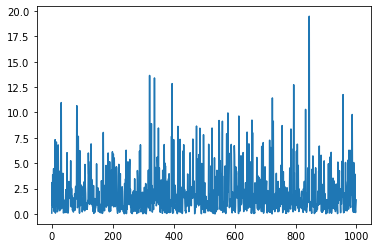

In [61]:
#
# variance change with "coarse graining"
some_data = np.random.gamma(1, scale=2, size=1000)
plt.plot(range(1000), some_data)

In [70]:
intrp100 = np.interp(np.linspace(0, 1000, 100), np.arange(0,1000), some_data)
intrp10 = np.interp(np.linspace(0, 1000, 10), np.arange(0,1000), some_data)

In [73]:
print(np.var(some_data))
print(np.var(intrp100))
print(np.var(intrp10))

4.928377305160675
2.5617514777520616
0.533748593612048


1.0634046210195909
0.6681479587250325
0.3049373401883874
1.0634046210195909
0.12179282982509801
0.007799335755022088


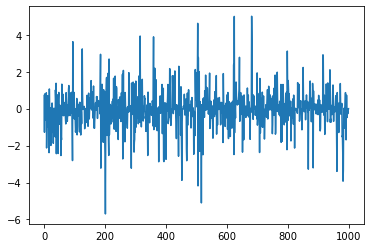

In [96]:
d2 = np.random.randn(1000)
# just make some events
# d2[75:80] = 10.0*(np.random.randn(5))**2
# d2[400:500] = 10.0*(np.random.randn(100))**2

# random spikes
# d2[np.random.randint(0, d2.shape[0], 10)] = 10.0*(np.random.randn(10))**2

d2[1:] = d2[1:]*d2[0:-1]


dintrp100 = np.interp(np.linspace(0, 1000, 100), np.arange(0,1000), d2)
dintrp10 = np.interp(np.linspace(0, 1000, 10), np.arange(0,1000), d2)
# block average
def block_avg(x, blocksize):
    i = 0
    result = []
    while i < len(x):
        result.append(np.mean(x[i:i+blocksize]))
        i += blocksize
    return result

dblk10 = block_avg(d2, 10)
dblk100 = block_avg(d2, 100)

plt.plot(range(1000), d2)
print(np.var(d2))
print(np.var(dintrp100))
print(np.var(dintrp10))


print(np.var(d2))
print(np.var(dblk10))
print(np.var(dblk100))



In [ ]:
intrp100 = np.interp(np.linspace(0, 1000, 100), np.arange(0,1000), some_data)
intrp10 = np.interp(np.linspace(0, 1000, 10), np.arange(0,1000), some_data)

In [92]:
d2[np.random.randint(0, d2.shape[0], 10)]

array([ 5.93308612, -0.26972938,  0.26437459,  1.63882749, -0.17554189,
       -0.55083966,  1.50045261,  0.20375572,  1.77151593,  0.41847121])

In [97]:
1/6

0.16666666666666666

In [98]:
4+4+3+4+3+2+3+3+3

29